<a href="https://colab.research.google.com/github/bhattacharjee/testdata/blob/main/FirstTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/bhattacharjee/testdata.git

Cloning into 'testdata'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [2]:
!ls testdata


FirstTry.ipynb	Moderate.zip  Proliferate_DR.zip
Mild.zip	No_DR.zip     Severe.zip


In [3]:
!unzip testdata/Mild.zip
!unzip testdata/Moderate.zip
!unzip testdata/No_DR.zip
!unzip testdata/Proliferate_DR.zip
!unzip testdata/Severe.zip

Archive:  testdata/Mild.zip
   skipping: Mild/1020_right.png     need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1100_left.png      need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1100_right.png     need PK compat. v6.3 (can do v4.6)
   skipping: Mild/114_left.png       need PK compat. v6.3 (can do v4.6)
   skipping: Mild/114_right.png      need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1283_left.png      need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1540_right.png     need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1544_right.png     need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1592_left.png      need PK compat. v6.3 (can do v4.6)
   skipping: Mild/1592_right.png     need PK compat. v6.3 (can do v4.6)
   skipping: Mild/17028_right.png    need PK compat. v6.3 (can do v4.6)
   skipping: Mild/17234_right.png    need PK compat. v6.3 (can do v4.6)
   skipping: Mild/227_left.png       need PK compat. v6.3 (can do v4.6)
   skipping: Mild/348_left.png      

In [4]:
!ls

Mild  Moderate	No_DR  Proliferate_DR  sample_data  Severe  testdata


In [17]:
import glob
import numpy as np
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def read_data():
    
    directories = {
        "No_DR": 0,
        "Mild": 1,
        "Moderate": 2,
        "Proliferate_DR": 3,
        "Severe": 4
    }

    def iterate_directory(directory:str, y_label:int):
        Y = np.zeros((0,))
        X = None
        for i in glob.glob(f"{directory}/*.png"):
            im = Image.open(i)
            im = ImageOps.grayscale(im)
            im = np.asarray(im)
            if None is X:
                X = np.zeros(tuple([0] + list(im.shape) + [1]))
            im = im.reshape(tuple([1] + list(im.shape) + [1]))
            im = im / 255.0
            im = im / np.max(im)
            X = np.concatenate((X, im), axis=0)
            Y = np.concatenate((Y, np.array([y_label])))
        return X, Y

    X = None
    Y = None
    for k, v in directories.items():
        x, y = iterate_directory(k, v)
        if None is X:
            X = x
        else:
            X = np.concatenate((X, x), axis=0)
        if None is Y:
            Y = y
        else:
            Y = np.concatenate((Y, y), axis=0)
          
    return X, Y

X, y = read_data()

X_train, X_test, y_train, y_test = train_test_split(\
        X, y, test_size=0.2, random_state=42)


(317, 224, 224, 1) (224, 224, 1) (317,)


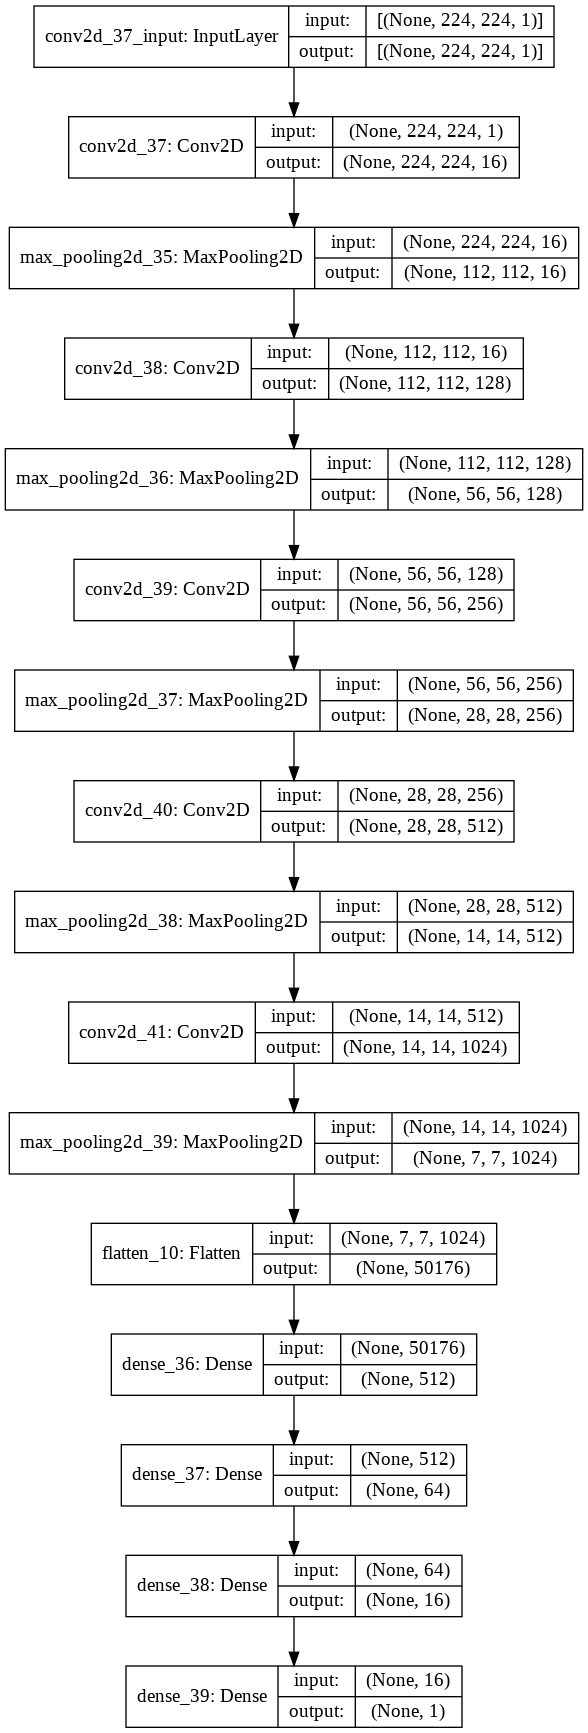

Model: "BaseLineShallowNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 224, 224, 16)      160       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 112, 112, 128)     18560     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 56, 56, 256)       819456    
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 512)

KeyboardInterrupt: ignored

In [19]:
import tensorflow as tf
import IPython

class BaselineShallowNet:
    @staticmethod
    def build(X_train, Y_train):
        model = tf.keras.Sequential(name="BaseLineShallowNet")
        model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', \
                  input_shape=X_train.shape[1:], activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2, 2,))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', \
                                         activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2, 2))
        model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', \
                                         activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2, 2))
        model.add(tf.keras.layers.Conv2D(512, (5, 5), padding='same', \
                                         activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2, 2))
        model.add(tf.keras.layers.Conv2D(1024, (5, 5), padding='same', \
                                         activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D(2, 2))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(512, activation='relu'))
        model.add(tf.keras.layers.Dense(64, activation='relu'))
        model.add(tf.keras.layers.Dense(16, activation='relu'))
        model.add(tf.keras.layers.Dense(1, activation='relu'))
        plot = tf.keras.utils.plot_model(model, show_shapes=True, \
                                         expand_nested=True)
        IPython.display.display(plot)
        print(model.summary())
        return model


N_EPOCHS=100

print(X_train.shape, X_train[0].shape, y_train.shape)
model = BaselineShallowNet.build(X_train, 1)
model.compile(optimizer='adam', \
              loss='mean_squared_error', \
              metrics=['accuracy'])

history = model.fit(X_train, y_train, \
                    validation_data=(X_test, y_test),\
                    batch_size=1,\
                    epochs=N_EPOCHS)